<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [131]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa_file = '/Users/ryandunlap/Desktop/DSI-SF-2/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'
iowa = pd.read_csv(iowa_file)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.info()
iowa.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38


In [4]:
Iowa_Liquor_Data_Dictionary = {
    "Overall Data Set" : "This dataset contains the spirits purchase information of Iowa Class 'E' liquor licensees by product and date of purchase from January 1, 2012 to current. The dataset can be used to analyze total spirits sales in Iowa of individual products at the store level.Class E liquor license, for grocery stores, liquor stores, convenience stores, etc., allows commercial establishments to sell liquor for off-premises consumption in original unopened containers.",
    "Size":('270955 rows by 18 columns'),
    "Column Details": {
        "Date": ('DateTime','Represents date of liqour sale'),
        "Store Number": ('Int','Store Number'),
        "City":('String','City store is located'),
        "Zip Code":('Int', 'Store zip code'),
        "County Number":('Float','County number'),
        "Category":('Float','Numerical value for alcohohl type'),
        "Category Name":('Object',"Type of alcohol"),
        "Vendor Number":('Int',"Number representing the the vendor alcohol purchased by store from"),
        "Item Number":('int',"Numeric value of item purchased"),
        "Item Description":('object',"Description of alcoholic item"),
        "Bottle Volume(ml)":('float',"Volume of alcoholic beverage in ml"),
        "State Bottle Cost":('float',"Cost state charges vendor to sell"),
        "State Bottle Retail":('float',"Cost store charges to customer"),
        "Bottle Sold":('int','Number of bottles sold to customer'),
        "Sale (Dollars)":('float','$ amount sold to customer. This is bottles sold * State Bottle Retail'),
        "Volume Sold (Liters)":('float','Volume sold in liters. This is bottle volume(ml) * Bottle Sold / 1000'),
        "Volume Sold (Gallons)":('float','Volume sold in gallons. This literes / 3.3.78541')
    }
}

Iowa_Liquor_Data_Dictionary

{'Column Details': {'Bottle Sold': ('int',
   'Number of bottles sold to customer'),
  'Bottle Volume(ml)': ('float', 'Volume of alcoholic beverage in ml'),
  'Category': ('Float', 'Numerical value for alcohohl type'),
  'Category Name': ('Object', 'Type of alcohol'),
  'City': ('String', 'City store is located'),
  'County Number': ('Float', 'County number'),
  'Date': ('DateTime', 'Represents date of liqour sale'),
  'Item Description': ('object', 'Description of alcoholic item'),
  'Item Number': ('int', 'Numeric value of item purchased'),
  'Sale (Dollars)': ('float',
   '$ amount sold to customer. This is bottles sold * State Bottle Retail'),
  'State Bottle Cost': ('float', 'Cost state charges vendor to sell'),
  'State Bottle Retail': ('float', 'Cost store charges to customer'),
  'Store Number': ('Int', 'Store Number'),
  'Vendor Number': ('Int',
   'Number representing the the vendor alcohol purchased by store from'),
  'Volume Sold (Gallons)': ('float',
   'Volume sold in gal

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [5]:
#Date convert to datetime ---> Have to learn sometime...
#Zip code convert to int
#State bottle cost strip out $ and convert to float
#State bottle retail strip out $ and convert to float
#Sales Dollars strip out $ and convert to float

### 3.2 Clean the columns

In [105]:
#Convert Date column to datetime data type  and add date parts- I'm a bit suprised this takes so long to run...
iowa['Date'] = pd.to_datetime(iowa['Date'])
iowa['Month'] = iowa['Date'].map(lambda x: x.month)
iowa['Day'] = iowa['Date'].map(lambda x: x.day)
iowa['Year'] = iowa['Date'].map(lambda x: x.year)

In [106]:
iowa.info()
def not_num_checker(x):
    try:
        x = float(x)
        return False
    except:
        return True

def find_invalid_items(data, column):
    print 'Column:', column
    print 'Invalid row items:'
    print [x for x in data[column].unique() if not_num_checker(x)]
    print '-------------------------------------------------\n'
            
find_invalid_items(iowa,'Zip Code')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 21 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null int64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270916 non-null float64
Category Name            270916 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
Month           

In [8]:
iowa[iowa['Zip Code'] == '712-2']
#Google search says the zip code for Dunlap Iowa is 51529. This store is giving my last name a bad name...
#I'm going to update the zip code and convert the column to an int. 
iowa.loc[iowa['Zip Code'] == '712-2','Zip Code'] = 51529

#recast column now that data is cleaned up
iowa['Zip Code'] = pd.to_numeric(iowa['Zip Code'])

<img src =http://m6.i.pbase.com/t6/78/624878/4/74602786.0l7kEUtw.jpg>

In [9]:
#Strip dollar sign out of the 3 $ related columns and re-cast to floats
col_cash = ['State Bottle Cost','State Bottle Retail','Sale (Dollars)']

for c in col_cash:
    iowa[c] = iowa[c].map(lambda x: float(x.replace('$','')))

In [10]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null int64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime

All of the data types look like they're in good shape now. The only remaining objects are City, County, Category Name, and Item Description which all make sense to be objects. It looks like we're missing some data though. County number, county, Category, and Category name all have null values. We're going to have to dig into these a bit more...

In [11]:
#Will fill in county and county number based on the City name. Assumption I'm making is every row that has City X
#should have Count Y. So I'm going to find the city:county pairs for every row that has county populated and load 
#these to a dictionary that I will use to fill in the missing values.
specified = iowa[~iowa['County'].isnull()][['City','County']]
paired = specified.groupby(specified['City'])['County'].max()
paired = paired.to_dict()

iowa['County'] = iowa['City'].map(paired)

#To help ensure consistency will use county to fill county number
specified = iowa[~iowa['County'].isnull()][['County Number','County']]
paired = specified.groupby(specified['County Number'])['County'].max()
paired = paired.to_dict()

iowa['County'] = iowa['County Number'].map(paired)
iowa.info()

# specified = iowa[~iowa['County Number'].isnull()][['City','County Number']]
# paired = specified.groupby(specified['City'])['County Number'].max()
# paired = paired.to_dict()

# iowa['County Number'] = iowa['City'].map(paired)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null int64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime

In [12]:
#Next is to look into why we are light on category
iowa[~iowa['Category'].isnull()]

specified = iowa[~iowa['Category'].isnull()][['Item Description','Category']]
paired = specified.groupby(specified['Item Description'])['Category'].max()
paired = paired.to_dict()

iowa['Category'] = iowa['Item Description'].map(paired)
iowa.info()

specified = iowa[~iowa['Category Name'].isnull()][['Category','Category Name']]
paired = specified.groupby(specified['Category'])['Category Name'].max()
paired = paired.to_dict()

iowa['Category Name'] = iowa['Category'].map(paired)
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null int64
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270916 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime

In [22]:
#At this point we have ~99% of the data in good shape so I'm going to make a judgement call and drop the null values
iowa_nonan = iowa.dropna()
iowa_nonan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269839 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269839 non-null datetime64[ns]
Store Number             269839 non-null int64
City                     269839 non-null object
Zip Code                 269839 non-null int64
County Number            269839 non-null float64
County                   269839 non-null object
Category                 269839 non-null float64
Category Name            269839 non-null object
Vendor Number            269839 non-null int64
Item Number              269839 non-null int64
Item Description         269839 non-null object
Bottle Volume (ml)       269839 non-null int64
State Bottle Cost        269839 non-null float64
State Bottle Retail      269839 non-null float64
Bottles Sold             269839 non-null int64
Sale (Dollars)           269839 non-null float64
Volume Sold (Liters)     269839 non-null float64
Volume Sold (Gallons)    269839 non-null float64
dtypes: datetime

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [103]:
#I'm assuming there is a cleaner way to do this... but finding stores that had first sale > 1/31 so they were not
#open the entire year and adding a new column flagging these with 1, and 0 if open in January
min_list = iowa_nonan.groupby(['Store Number'])[['Date']].min().reset_index()
min_stores = min_list[min_list.Date > '1/31/2015']['Store Number']
min_index = iowa_nonan['Store Number'].isin(min_stores)
iowa_nonan.loc[min_index, 'Open_Mid_Year'] = 1
iowa_nonan.loc[~min_index, 'Open_Mid_Year'] = 0

#I'm assuming there is a cleaner way to do this... but finding stores that had last sale <12/1 so they were not
#open the entire year and adding a new column flagging these with 1, and 0 if open in December
max_list = iowa_nonan.groupby(['Store Number'])[['Date']].max().reset_index()
max_stores = min_list[min_list.Date < '12/1/2015']['Store Number']
max_index = iowa_nonan['Store Number'].isin(max_stores)
iowa_nonan.loc[max_index, 'Closed_Mid_Year'] = 1
iowa_nonan.loc[~max_index, 'Closed_Mid_Year'] = 0

iowa_nonan.info()

iowa_nonan.Date.unique()

#I added two new features (one to flag stores that opened late and the other for stores that closed early). These 
#features will allow me to subset the data later if desired while still being able to look at entire data set. 
#Unless I have a reason to have a strong view that the number of stores opening/closing this year is abnormal 
#would be good to keep these in here to get an idea of what typical figures are statewide.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269839 entries, 0 to 270954
Data columns (total 23 columns):
Date                           269839 non-null datetime64[ns]
Store Number                   269839 non-null int64
City                           269839 non-null object
Zip Code                       269839 non-null int64
County Number                  269839 non-null float64
County                         269839 non-null object
Category                       269839 non-null float64
Category Name                  269839 non-null object
Vendor Number                  269839 non-null int64
Item Number                    269839 non-null int64
Item Description               269839 non-null object
Bottle Volume (ml)             269839 non-null int64
State Bottle Cost              269839 non-null float64
State Bottle Retail            269839 non-null float64
Bottles Sold                   269839 non-null int64
Sale (Dollars)                 269839 non-null float64
Volume Sold (Liter

array(['2015-11-04T00:00:00.000000000', '2016-03-02T00:00:00.000000000',
       '2016-02-11T00:00:00.000000000', '2016-02-03T00:00:00.000000000',
       '2015-08-18T00:00:00.000000000', '2015-04-20T00:00:00.000000000',
       '2015-08-05T00:00:00.000000000', '2015-06-25T00:00:00.000000000',
       '2016-01-04T00:00:00.000000000', '2015-11-10T00:00:00.000000000',
       '2015-09-28T00:00:00.000000000', '2015-10-28T00:00:00.000000000',
       '2015-01-22T00:00:00.000000000', '2016-02-29T00:00:00.000000000',
       '2015-06-10T00:00:00.000000000', '2016-02-25T00:00:00.000000000',
       '2015-12-29T00:00:00.000000000', '2015-12-26T00:00:00.000000000',
       '2015-03-04T00:00:00.000000000', '2015-01-16T00:00:00.000000000',
       '2015-01-13T00:00:00.000000000', '2015-03-24T00:00:00.000000000',
       '2015-11-12T00:00:00.000000000', '2016-03-14T00:00:00.000000000',
       '2015-02-03T00:00:00.000000000', '2015-11-23T00:00:00.000000000',
       '2015-04-21T00:00:00.000000000', '2015-12-01

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [111]:
date_mask = (iowa_nonan['Date'] > '12/31/2014') & (iowa_nonan['Date'] <= '12/31/2015')
iowa_2015 = iowa_nonan[date_mask]
iowa_2015.groupby(['Store Number'])[['Sale (Dollars)']].sum().reset_index().sort_values(by='Sale (Dollars)',ascending=False)

,Store Number,Sale (Dollars)
125,2633,1000783.30
1032,4829,878812.70
194,3385,441983.55
36,2512,419746.83
200,3420,352020.66
389,3952,333311.98
323,3814,247417.42
193,3354,240365.94
306,3773,232460.41
153,2670,227442.71


### 5.2 Calculate the profit each store is making in 2015.


In [116]:
iowa_2015.loc[:,'Cost (Dollars)'] = iowa_2015['Bottles Sold'] * iowa_2015['State Bottle Cost']
iowa_2015.loc[:,'Profit (Dollars)'] = iowa_2015['Sale (Dollars)'] - iowa_2015['Cost (Dollars)']

iowa_2015.groupby(['Store Number'])[['Profit (Dollars)']].sum().reset_index().sort_values(by='Profit (Dollars)',ascending=False).head()

,Store Number,Profit (Dollars)
125,2633,333816.91
1032,4829,293196.99
194,3385,147884.62
36,2512,140143.46
200,3420,117593.34


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [243]:
#iowa_nonan.loc[:,'Profit (Dollars) Per Gallon'] = iowa_nonan['Profit (Dollars)'] / iowa_nonan['Volume Sold (Gallons)']
iowa_total = iowa_2015.groupby(['County'])[['Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()
iowa_total['Profit Per Gallon'] = iowa_total['Profit (Dollars)'] / iowa_total['Volume Sold (Gallons)']
iowa_total.sort_values(by='Profit Per Gallon',ascending=False).head()

#iowa_nonan.head()

,County,Profit (Dollars),Volume Sold (Gallons),Profit Per Gallon
45,Johnson,574448.08,27966.64,20.540475
70,Polk,2306836.98,117304.06,19.665449
44,Jefferson,27896.95,1446.20,19.289829
75,Scott,721662.12,37630.79,19.177437
25,Des Moines,129030.70,6808.22,18.952193


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

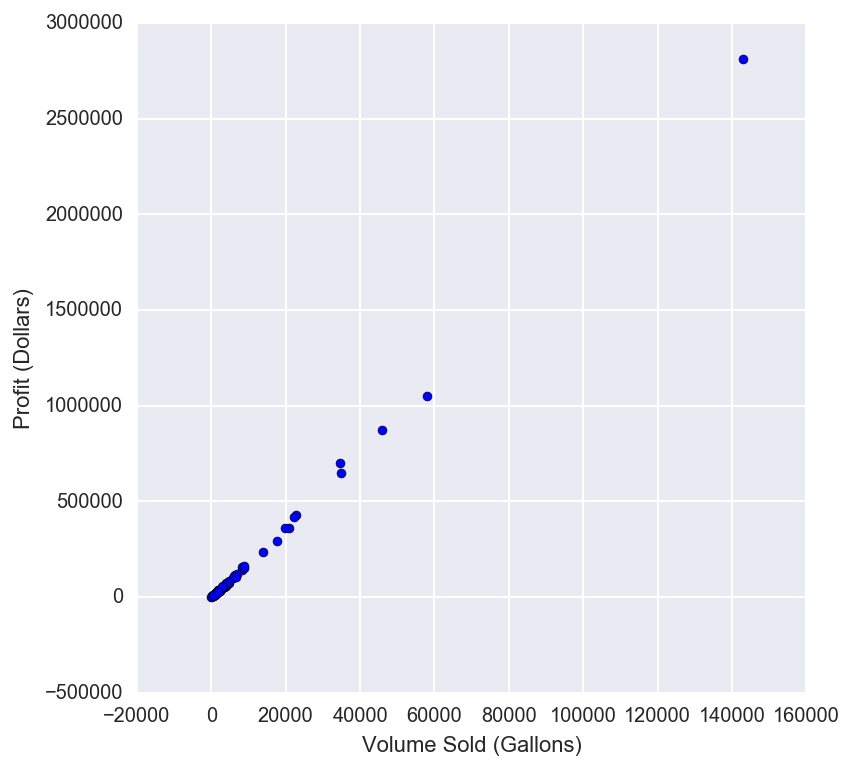

In [135]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

ax.scatter(iowa_total['Volume Sold (Gallons)'],iowa_total['Profit (Dollars)'])
ax.set_xlabel("Volume Sold (Gallons)")
ax.set_ylabel("Profit (Dollars)")

plt.show()

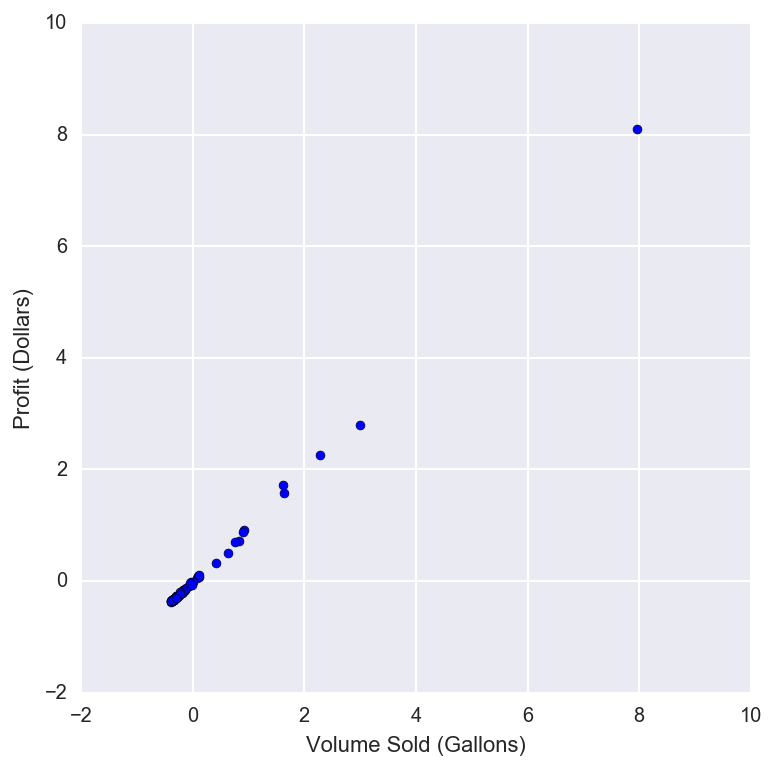

In [136]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iowa_total.iloc[:,1:])
iowa_total_stand = pd.DataFrame(scaled_data, columns=['Profit (Dollars)','Volume Sold (Gallons)','Profit Per Gallon'])

ax.scatter(iowa_total_stand['Volume Sold (Gallons)'],iowa_total_stand['Profit (Dollars)'])
ax.set_xlabel("Volume Sold (Gallons)")
ax.set_ylabel("Profit (Dollars)")

plt.show()

#The relationship looks pretty linear so the ratio is relatively consistent. This lead me to believe it is a 
#competitive market and each store is effectively a price taker. 

### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [157]:
iowa_nonan['Category Name'].unique()

def new_liqours(row):
    liquor = row['Category Name']
    hard_liquor = ['SPIRITS','RYE','BRANDIES','WHISKIES','BOURBON','VODKA','GINS','WHISKY','RUM','SCOTCH','TEQUILA']
    liqueur = ['SCHNAPPS','LIQUEUR','CREME','AMARETTO','TRIPLE SEC','ANISETTE']
    if any(l in liquor for l in hard_liquor):
        booze = 'Hard Liquor'
    elif any(l in liquor for l in liqueur):
        booze = 'Liqueur'
    elif any(l in liquor for l in ['BEER']):
        booze = 'Beer'
    elif any(l in liquor for l in ['COCKTAILS']):
        booze = 'Cocktail'
    else:
        booze = 'Other'
    return booze
    
iowa_nonan.loc[:,'Broad Category'] = iowa_nonan.apply(new_liqours,axis=1)
iowa_nonan[iowa_nonan['Broad Category']=='MISSING']['Category Name'].unique()

array([], dtype=object)

### 5.7 Do relationships exist between the broader liquor type and profit?

In [174]:
iowa_nonan.groupby(['Broad Category'])['Profit (Dollars) Per Gallon'].mean()
#iowa_nonan[iowa_nonan['Broad Category']=='Cocktail'][['Item Description','Bottles Sold','State Bottle Cost','State Bottle Retail','Profit (Dollars) Per Gallon']]
#print iowa_nonan.columns

#Straight liquor and liquers have similar profit/gallon. Cocktails are much lower. The Sam Adams beer is a real outlier
#in the beer category. 

Broad Category
Beer           237.950000
Cocktail         9.434812
Hard Liquor     23.118545
Liqueur         23.134406
Name: Profit (Dollars) Per Gallon, dtype: float64

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

In [ ]:
#If had more time to work on this would do something similar to problem before using string matching to categorize
# liquors. 

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [282]:
iowa_nonan.groupby(['Store Number','Broad Category'])[['Volume Sold (Gallons)','Profit (Dollars)']].sum().reset_index().sort_values(by='Volume Sold (Gallons)',ascending=False)
iowa_nonan.info()

# Ran out of time to tackle this one. When I labeled alchohol types above they were way to broad so can't get a ton 
# of insight off of them. With more time I would label liquor slightly more granularly. For example rum, vokda, tequila,
# etc. From there I would create a pivot table grouped by liquor type and size (which I would need to set based on a 
# band based on maybe Z score). The hope is that you would find a liquor type that is dispraportionatley sold
# at the larger stores which you would then impose a tax on that type of liquor. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269839 entries, 0 to 270954
Data columns (total 25 columns):
Date                           269839 non-null datetime64[ns]
Store Number                   269839 non-null int64
City                           269839 non-null object
Zip Code                       269839 non-null int64
County Number                  269839 non-null float64
County                         269839 non-null object
Category                       269839 non-null float64
Category Name                  269839 non-null object
Vendor Number                  269839 non-null int64
Item Number                    269839 non-null int64
Item Description               269839 non-null object
Bottle Volume (ml)             269839 non-null int64
State Bottle Cost              269839 non-null float64
State Bottle Retail            269839 non-null float64
Bottles Sold                   269839 non-null int64
Sale (Dollars)                 269839 non-null float64
Volume Sold (Liter

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [264]:
date_mask = (iowa_nonan['Date'] > '12/31/2014') & (iowa_nonan['Date'] <= '3/31/2015')
Q1_2015 = iowa_nonan[date_mask]

date_mask = (iowa_nonan['Date'] > '12/31/2015') & (iowa_nonan['Date'] <= '3/31/2016')
Q1_2016 = iowa_nonan[date_mask]

Q1_15_Store_Sum = Q1_2015.groupby(['City'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()
Q1_16_Store_Sum = Q1_2016.groupby(['City'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()

combined_Q = pd.merge(Q1_15_Store_Sum,Q1_16_Store_Sum,how='inner',on='City')
combined_Q.head()

,City,Sale (Dollars)_x,Cost (Dollars)_x,Profit (Dollars)_x,Volume Sold (Gallons)_x,Sale (Dollars)_y,Cost (Dollars)_y,Profit (Dollars)_y,Volume Sold (Gallons)_y
0,ACKLEY,1868.10,1245.26,622.84,50.69,840.14,559.95,280.19,19.02
1,ADAIR,1379.04,919.08,459.96,24.76,893.16,595.32,297.84,14.67
2,ADEL,11657.81,7769.51,3888.30,219.30,9620.94,6392.77,3228.17,207.20
3,AFTON,729.12,486.00,243.12,9.52,538.32,358.80,179.52,13.48
4,AKRON,1249.34,829.50,419.84,27.81,1154.13,769.26,384.87,22.77


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [263]:
combined_Q['Sales Growth'] = combined_Q['Sale (Dollars)_y']/combined_Q['Sale (Dollars)_x'] - 1
combined_Q.loc[:,'Log Growth'] = combined_Q['Sales Growth'].map(lambda x: np.log(1+x))
combined_Q.loc[:,'Log Q1'] = combined_Q['Sale (Dollars)_y'].map(lambda x: np.log(1+x))
combined_Q['Q1 Z'] = (combined_Q['Log Q1'] - combined_Q['Log Q1'].mean())/combined_Q['Log Q1'].std()
combined_Q['Growth Z'] = (combined_Q['Log Growth'] - combined_Q['Log Growth'].mean())/combined_Q['Log Growth'].std()
combined_Q['Score'] = (combined_Q['Q1 Z'] + combined_Q['Growth Z'])/2

combined_Q.head()
score_filter = (combined_Q['Q1 Z'] > 0) & (combined_Q['Growth Z'] > 0) #& combined_Q['Q1 Z'] > 1
combined_Q[score_filter].sort_values(by='Score',ascending=False).head()
#combined_Q.sort_values(by='Score',ascending=False).head()

,City,Sale (Dollars)_x,Cost (Dollars)_x,Profit (Dollars)_x,Volume Sold (Gallons)_x,Sale (Dollars)_y,Cost (Dollars)_y,Profit (Dollars)_y,Volume Sold (Gallons)_y,Sales Growth,Log Growth,Q1 Z,Growth Z,Score,Log Q1
246,OKOBOJI,11.21,7.47,3.74,0.13,944.98,629.84,315.14,23.50,83.297948,4.434358,-0.768357,6.743849,2.987746,6.852221
86,DES MOINES,764494.27,509277.76,255216.51,12650.39,813521.18,542098.78,271422.40,13464.76,0.064130,0.062157,3.333443,-0.012388,1.660528,13.609128
148,HARPERS FERRY,60.12,40.08,20.04,2.38,883.47,579.86,303.61,25.17,13.695110,2.687515,-0.809171,4.044502,1.617665,6.784989
306,STANWOOD,148.80,99.00,49.80,4.13,1615.68,1077.00,538.68,20.37,9.858065,2.384908,-0.443033,3.576893,1.566930,7.388130
79,DAVENPORT,272933.35,181754.90,91178.45,4628.53,309792.14,206436.59,103355.55,5900.10,0.135047,0.126674,2.747352,0.087308,1.417330,12.643660


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [262]:
#There is quite a bit of variance in the sales across stores. I took the log of the values to tighten up the 
#distribution. From there I calculated the Z score for growhth and sales for each city relative to the total population.
#The score I used is taking the average of these two numbers. There is additionally a screen requiring the City
#to be above the mean for both growth and sales. This is to help filter out some of the tiny cities where any kind of 
#sales growth created a giant growth Z score. Given all of this I would recommend Davenport.

combined_Q[combined_Q['City']=='DAVENPORT']

,City,Sale (Dollars)_x,Cost (Dollars)_x,Profit (Dollars)_x,Volume Sold (Gallons)_x,Sale (Dollars)_y,Cost (Dollars)_y,Profit (Dollars)_y,Volume Sold (Gallons)_y,Sales Growth,Log Growth,Q1 Z,Growth Z,Score,Log Q1
79,DAVENPORT,272933.35,181754.9,91178.45,4628.53,309792.14,206436.59,103355.55,5900.1,0.135047,0.126674,2.747352,0.087308,1.41733,12.64366


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [281]:
Q1_15_Type_Sum = Q1_2015.groupby(['Item Description'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()
Q1_16_Type_Sum = Q1_2016.groupby(['Item Description'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()

combined_Q_2 = pd.merge(Q1_15_Type_Sum,Q1_16_Type_Sum,how='inner',on=['Item Description'])
print combined_Q_2.sort_values(by='Profit (Dollars)_y',ascending=False).head()
#Grouping purely by item description in Q1 2016 Black Velvet is the most profitable liquor

Q1_15_City_Type_Sum = Q1_2015.groupby(['City','Item Description'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()
Q1_16_City_Type_Sum = Q1_2016.groupby(['City','Item Description'])[['Sale (Dollars)','Cost (Dollars)','Profit (Dollars)','Volume Sold (Gallons)']].sum().reset_index()

combined_Q_2 = pd.merge(Q1_15_City_Type_Sum,Q1_16_City_Type_Sum,how='inner',on=['City','Item Description'])
combined_Q_2[combined_Q_2['Item Description'] == 'Black Velvet'].sort_values(by='Profit (Dollars)_y',ascending=False)
#Denison is the top selling city for Black Velvet

                  Item Description  Sale (Dollars)_x  Cost (Dollars)_x  \
130                   Black Velvet         298406.36         196712.71   
558  Jack Daniels Old #7 Black Lbl         214998.92         143320.38   
224      Captain Morgan Spiced Rum         238600.57         159033.25   
437      Fireball Cinnamon Whiskey         132859.61          88568.34   
301    Crown Royal Canadian Whisky         151185.35         100784.12   

     Profit (Dollars)_x  Volume Sold (Gallons)_x  Sale (Dollars)_y  \
130           101693.65                  8585.67         286590.32   
558            71678.54                  2117.22         206271.27   
224            79567.32                  3649.85         203567.20   
437            44291.27                  2104.08         179000.88   
301            50401.23                  1431.22         144682.07   

     Cost (Dollars)_y  Profit (Dollars)_y  Volume Sold (Gallons)_y  
130         188942.00            97648.32                  8182.9

,City,Item Description,Sale (Dollars)_x,Cost (Dollars)_x,Profit (Dollars)_x,Volume Sold (Gallons)_x,Sale (Dollars)_y,Cost (Dollars)_y,Profit (Dollars)_y,Volume Sold (Gallons)_y
3758,DENISON,Black Velvet,402.00,267.84,134.16,10.30,19652.22,12783.48,6868.74,604.30
9016,SIOUX CITY,Black Velvet,4832.52,3205.14,1627.38,131.90,16147.52,10597.42,5550.10,473.77
3874,DES MOINES,Black Velvet,12686.11,8433.68,4252.43,331.61,13667.93,9065.01,4602.92,356.78
5034,FORT DODGE,Black Velvet,4583.25,3054.09,1529.16,126.82,12748.44,8330.82,4417.62,384.17
1813,CEDAR RAPIDS,Black Velvet,10503.59,6973.73,3529.86,290.80,11740.10,7763.08,3977.02,318.35
8045,NORWALK,Black Velvet,540.64,360.14,180.50,13.08,10333.86,6732.30,3601.56,315.83
8153,ORANGE CITY,Black Velvet,188.40,125.52,62.88,4.76,9442.62,6147.36,3295.26,288.89
9671,TIPTON,Black Velvet,461.40,304.50,156.90,13.87,9005.10,5851.38,3153.72,278.57
9952,WATERLOO,Black Velvet,5650.38,3744.30,1906.08,159.66,7520.88,4989.00,2531.88,206.03
4749,ELDORA,Black Velvet,872.16,581.22,290.94,24.97,5098.26,3319.62,1778.64,155.74


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?